In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
meta=pd.read_csv('META-Metazygia monitor 1.csv')

In [2]:
def setindex(df):
    df['Date_Time']=pd.to_datetime(df['Date'] + ' ' + df['Time'])
    df = df.set_index(pd.DatetimeIndex(df['Date_Time']))
    df = df.drop(['Date', 'Time'], axis = 1)
    return df

In [24]:
df=pd.read_csv('Metazygia monitor 1.csv', index_col=0)
df['Date_Time'] = df.index
dfdark=df.iloc[7200:]
dflight=df.iloc[:7200]
#df['Date_Time'] = df.index
column=df.columns[1:-1]
print(column)

Index(['Monitor 1 Spider 1', 'Monitor 1 Spider 2', 'Monitor 1 Spider 3',
       'Monitor 1 Spider 4', 'Monitor 1 Spider 5', 'Monitor 1 Spider 6',
       'Monitor 1 Spider 7', 'Monitor 1 Spider 8', 'Monitor 1 Spider 9',
       'Monitor 1 Spider 10', 'Monitor 1 Spider 11', 'Monitor 1 Spider 12',
       'Monitor 1 Spider 13', 'Monitor 1 Spider 14', 'Monitor 1 Spider 15',
       'Monitor 1 Spider 16', 'Monitor 1 Spider 18', 'Monitor 1 Spider 19',
       'Monitor 1 Spider 20', 'Monitor 1 Spider 21', 'Monitor 1 Spider 25',
       'Monitor 1 Spider 26', 'Monitor 1 Spider 27', 'Monitor 1 Spider 28',
       'Monitor 1 Spider 29', 'Monitor 1 Spider 30', 'Monitor 1 Spider 31',
       'Monitor 1 Spider 32'],
      dtype='object')


In [4]:
import math 
df1=df.copy()
columns=df1.columns[1:-1]

In [5]:
dfcos=dfdark.loc[:,['lights','Monitor 1 Spider 21']]
dfcos['test']='Spider'
dfcos['real']=dfdark['Monitor 1 Spider 21']
dfcos['y']=dfcos['real'].rolling(window=60).mean()
dfcos['x']=range(0,len(dfcos.real))
#dfcos=dfcos.drop(columns=['lights', 'Monitor 1 Spider 21'])
dfcos=dfcos.dropna()


In [25]:
display(df)

,lights,Monitor 1 Spider 1,Monitor 1 Spider 2,Monitor 1 Spider 3,Monitor 1 Spider 4,Monitor 1 Spider 5,Monitor 1 Spider 6,Monitor 1 Spider 7,Monitor 1 Spider 8,Monitor 1 Spider 9,...,Monitor 1 Spider 21,Monitor 1 Spider 25,Monitor 1 Spider 26,Monitor 1 Spider 27,Monitor 1 Spider 28,Monitor 1 Spider 29,Monitor 1 Spider 30,Monitor 1 Spider 31,Monitor 1 Spider 32,Date_Time
Date_Time,,,,,,,,,,,,,,,,,,,,,
2017-04-21 00:00:00,0,0,0,0,0,1,3,0,0,3,...,0,0,0,0,2,5,0,0,0,2017-04-21 00:00:00
2017-04-21 00:01:00,0,0,0,0,0,0,9,0,0,16,...,0,0,0,0,5,10,0,0,0,2017-04-21 00:01:00
2017-04-21 00:02:00,0,0,0,0,0,7,2,0,0,10,...,0,0,0,4,4,4,0,0,0,2017-04-21 00:02:00
2017-04-21 00:03:00,0,0,0,0,0,6,0,0,0,0,...,0,0,0,0,5,4,0,0,0,2017-04-21 00:03:00
2017-04-21 00:04:00,0,0,0,0,2,2,0,0,0,2,...,0,0,0,0,3,2,0,0,0,2017-04-21 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-04 23:55:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017-05-04 23:55:00
2017-05-04 23:56:00,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,2017-05-04 23:56:00
2017-05-04 23:57:00,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,2017-05-04 23:57:00


In [10]:
#from gatspy.periodic import periodogram_auto
from gatspy.periodic import LombScargleFast
    
time = range(len(dfcos.x))
##Use rolling average to find period:
#move = dfcos['y'].values
##Use real data to find period:
move = dfcos['real'].values
model = LombScargleFast().fit(time, move)
periods, power = model.periodogram_auto()
eightteen_hours=18*60
thirtysix_hours=36*60
#Estimated periods will fall between 18 and thirty-six hours
model.optimizer.period_range = (eightteen_hours, thirtysix_hours)

period = model.best_period
#Record period in hours
periodh=(period/60)
display(periodh)



Finding optimal frequency:
 - Estimated peak width = 0.000487
 - Using 5 steps per peak; omega_step = 9.74e-05
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 31 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


23.4505659645636

In [11]:
per=pd.DataFrame(index=columns)

In [12]:
period=np.empty(len(columns))
for i in range(len(columns)):
    time = range(len(dfdark.index))
    move = dfdark[columns[i]].values
    model = LombScargleFast().fit(time, move)
    #18-36 hours
    model.optimizer.period_range = (eightteen_hours, thirtysix_hours)
    period[i] = (model.best_period)/60
    
    


Finding optimal frequency:
 - Estimated peak width = 0.000485
 - Using 5 steps per peak; omega_step = 9.7e-05
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 31 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Finding optimal frequency:
 - Estimated peak width = 0.000485
 - Using 5 steps per peak; omega_step = 9.7e-05
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 31 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Finding optimal frequency:
 - Estimated peak width = 0.000485
 - Using 5 steps per peak; omega_step = 9.7e-05
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 31 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Finding optimal frequency:
 - Estimated peak width = 0.000485
 - Using 5 steps per peak; omega_step = 9.7e-05
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 31 steps
Zooming-in on 5 can

In [13]:
per['Period']=period
display(per)

,Period
Monitor 1 Spider 1,21.946098
Monitor 1 Spider 2,21.305306
Monitor 1 Spider 3,24.450380
Monitor 1 Spider 4,24.662566
Monitor 1 Spider 5,21.326343
Monitor 1 Spider 6,22.180489
Monitor 1 Spider 7,18.762337
Monitor 1 Spider 8,23.220177
Monitor 1 Spider 9,23.787924
Monitor 1 Spider 10,22.904977


## Raster Functions

In [98]:
#Create uniform y-axis limit
def create_ylimit(df):
    #find the standard deviation and mean of each column from the dataset without zeros
    df_limit=df.replace(0, np.nan)
    std=df_limit.std()
    mean=df_limit.mean()
    #Find mean and standard deviation of all of the data
    df_mean=np.mean(mean)
    df_std =np.mean(std)
    #y limit = mean of the dataframe plus 3 standard deviations
    y_limit = df_mean +3*df_std
    return y_limit

def plot_night_test(df):
    #Make a copy of the dataframe and create two columns for the difference between the light values and for the date and time
    dfc = df.copy()
    dfc['diff'] = dfc.lights.diff()
    dfc[["day", "time"]] = dfc["Date_Time"].str.split(" ", expand = True)
    #Separate by the difference to determine when the light is coming on or going off
    df_off = dfc.loc[dfc['diff'] == 1]
    df_on = dfc.loc[dfc['diff'] == -1]
    #Assign variable from the lists
    start1 = dfc.time.values[0]
    end1 = df_off.time.values[0]
    start2 = df_on.time.values[0]
    end2 = dfc.time.values[-1]

    return start1, start2, end1, end2

#Plot activity in subplots
#Imput:Dataframe, List of spiders in df, Specific Spider from list, 
#Label for subplots, variable from "create_ylimit" funnction 
#All variables will be named in final raster plot function
def plot_raster( df, column, spider, ax, y, num_days, min_day): 
    
    for i in range(0,num_days):
        #Separate dataframe into sections of 1440 minutes(minutes in a day) and plot the 
        #activity for each day
        ax[i].plot(df['time'][min_day*i:min_day*(i+1)], df[column[spider]][min_day*i:min_day*(i+1)], color='blue')
        #Label each day
        ax[i].set_ylabel('Subj. Day '+str(i+1))
        #ax[i].set_ylabel(df.day[min_day*i])
        ax[i].set_xticks([])
        # the y limit is the mean plus 3 standard deviations
        ax[i].set_ylim(0,y)
        #setting instructions for shading the graph when the lights are off
        df1=df[min_day*(i):min_day*(i+1)]
        #df1=df1.reset_index()
        #Make DD plots all grey
        if np.mean(df1.lights)==0:
            ax[i].axvspan(0,min_day, alpha=.5,color='grey')
        #Run function to determine when lights are off during LD cycle
        else:
            start1, start2, end1, end2 = plot_night_test(df1)
            ax[i].axvspan(start1, end1, alpha=0.5, color='grey')
            ax[i].axvspan(start2, end2,alpha=0.5, color='grey')
            
#Combine all funtions to make raster plots for all spiders given a data frame and list of spiders
def spider_raster(df, per):
    #create a copy and separate the date and time for reference
    global df_time
    df_time = df.copy()
    df_time[["day", "time"]] = df_time["Date_Time"].str.split(" ", expand = True)
    #min_day= 1440
    #for loop for creating figures for the number of spiders in the dataframe
    for spider in  range(len(column)):
        #Determine length of usable data for each spider
        dftest=df[column[spider]].dropna()
        print(column[spider])
        global perT
        perT = per.T
        #display(perT)
        min_day = int((perT[column[spider]].values) * 60)
        #sub_mins_day = per.iloc[0]['A']
        #print(min_day)
        total_time = len(dftest.index)
        num_days = total_time//min_day
        #Plot subplots
        fig, ax=plt.subplots(num_days,1, figsize=(8,12), sharey=True, sharex=True)
        fig.suptitle('The Free Running Period of: ' + column[spider], fontsize=16)        
        #setting the y axis limit
        y = create_ylimit(df) 
        #plotting the raster plots
        plot_raster(df_time, column, spider, ax, y, num_days, min_day)
        #plot x axis
        ax[num_days-1].set_xticks(range(0, min_day, 360))
        plt.xlabel('Time')
        #save figure
        #fig.savefig(column[spider] +'raster.jpg')
        #plt.show()
        print('Next spider')

Monitor 1 Spider 1
Next spider
Monitor 1 Spider 2
Next spider
Monitor 1 Spider 3
Next spider
Monitor 1 Spider 4
Next spider
Monitor 1 Spider 5
Next spider
Monitor 1 Spider 6
Next spider
Monitor 1 Spider 7
Next spider
Monitor 1 Spider 8
Next spider
Monitor 1 Spider 9
Next spider
Monitor 1 Spider 10
Next spider
Monitor 1 Spider 11
Next spider
Monitor 1 Spider 12
Next spider
Monitor 1 Spider 13
Next spider
Monitor 1 Spider 14
Next spider
Monitor 1 Spider 15
Next spider
Monitor 1 Spider 16
Next spider
Monitor 1 Spider 18
Next spider
Monitor 1 Spider 19
Next spider
Monitor 1 Spider 20
Next spider
Monitor 1 Spider 21
Next spider
Monitor 1 Spider 25


<ipython-input-98-612c4150f301>:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax=plt.subplots(num_days,1, figsize=(8,12), sharey=True, sharex=True)


Next spider
Monitor 1 Spider 26
Next spider
Monitor 1 Spider 27
Next spider
Monitor 1 Spider 28
Next spider
Monitor 1 Spider 29
Next spider
Monitor 1 Spider 30
Next spider
Monitor 1 Spider 31
Next spider
Monitor 1 Spider 32


KeyError: 'Monitor 1 Spider 32'

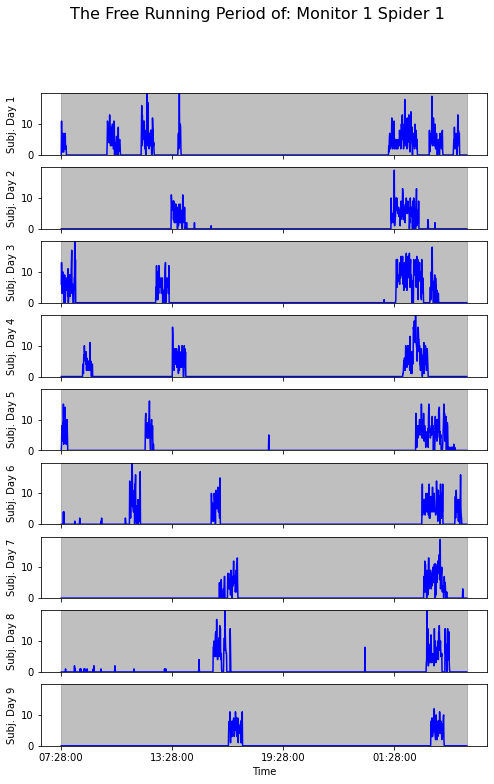

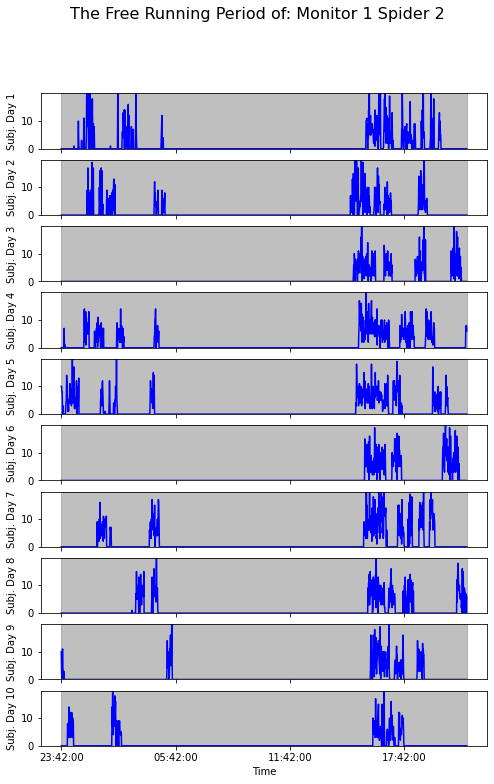

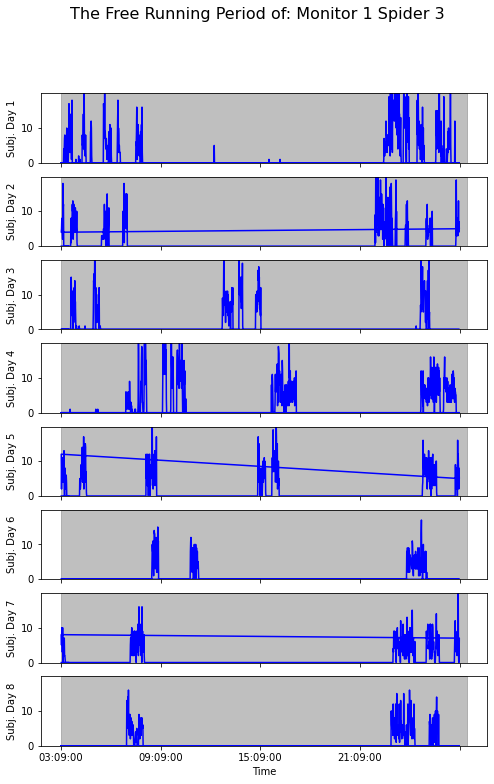

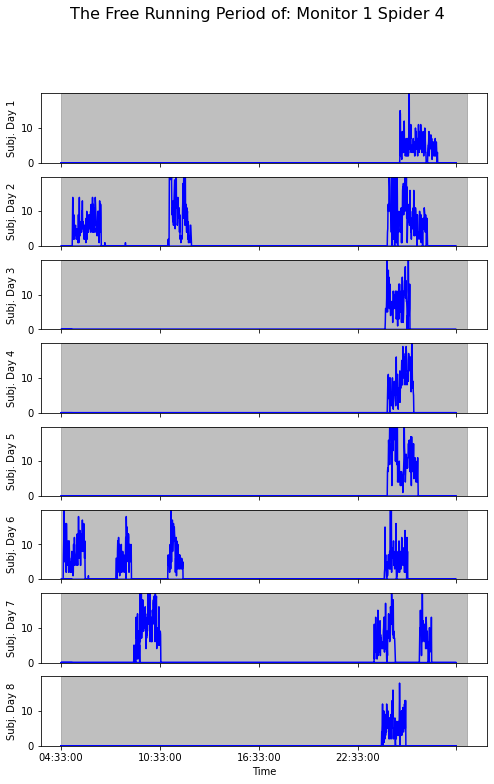

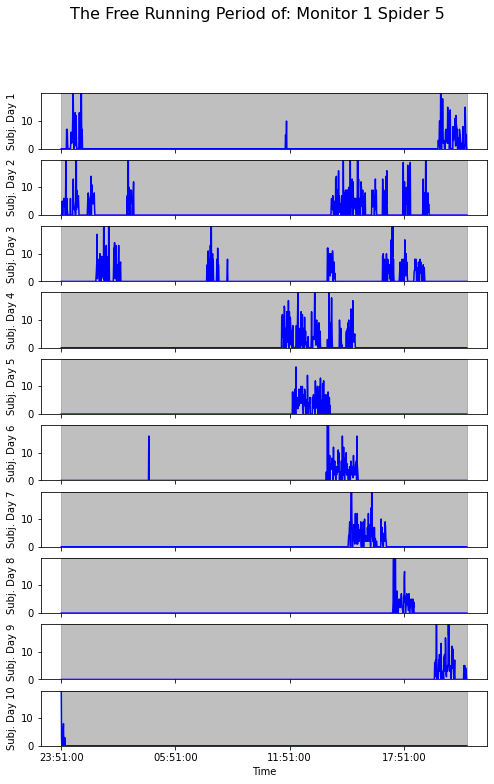

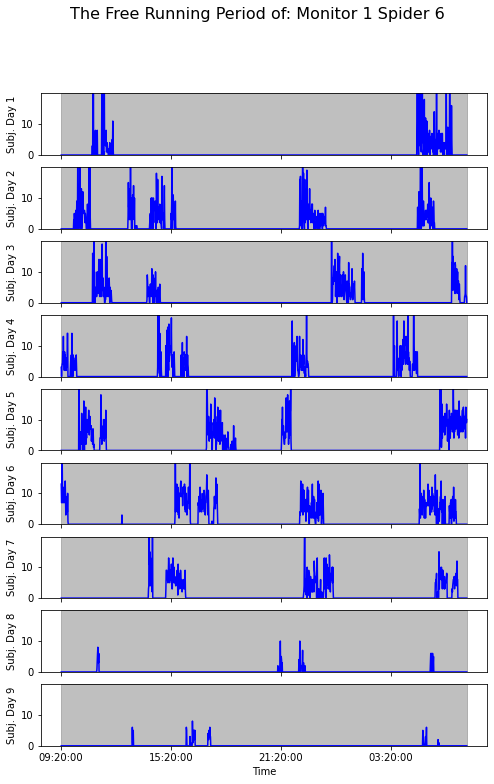

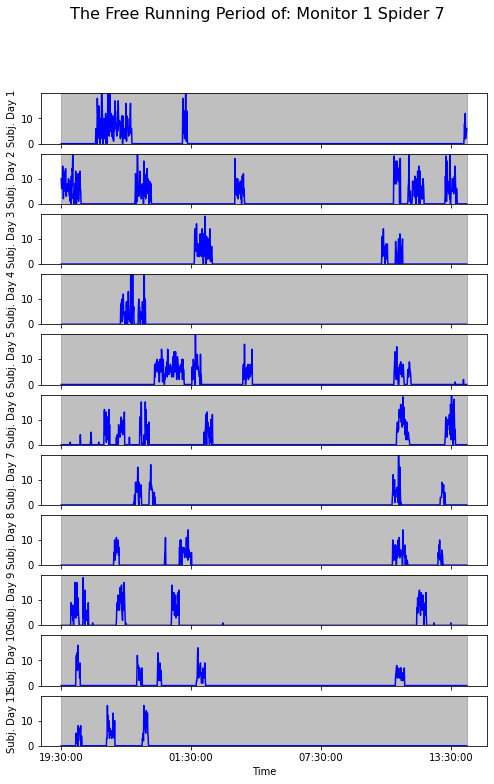

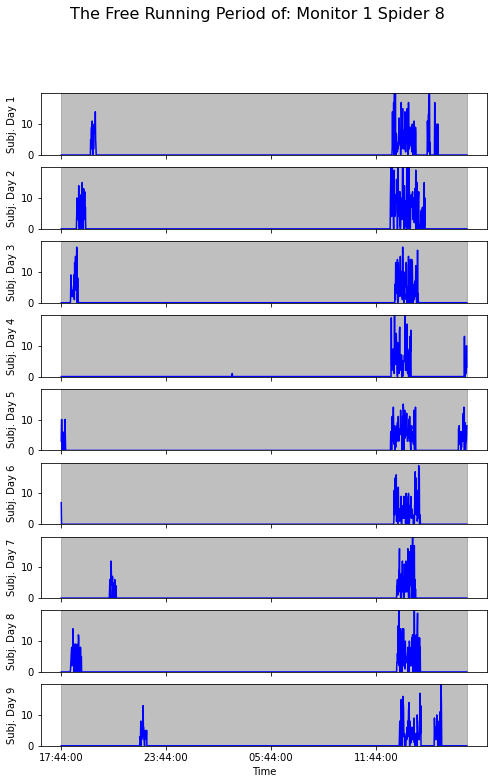

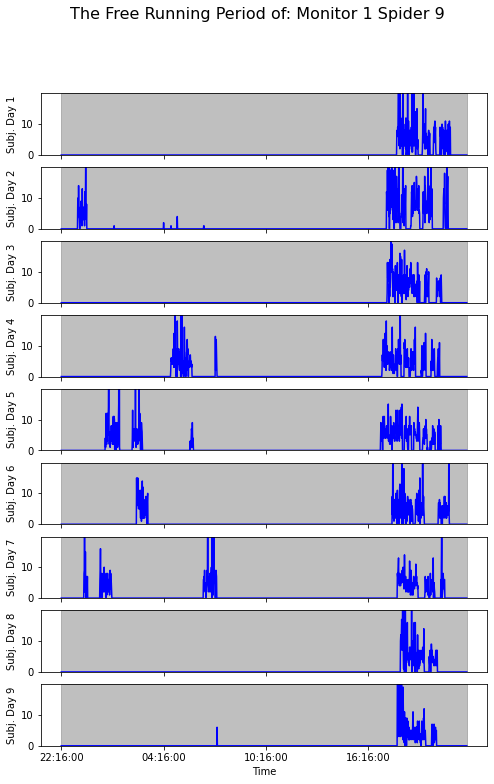

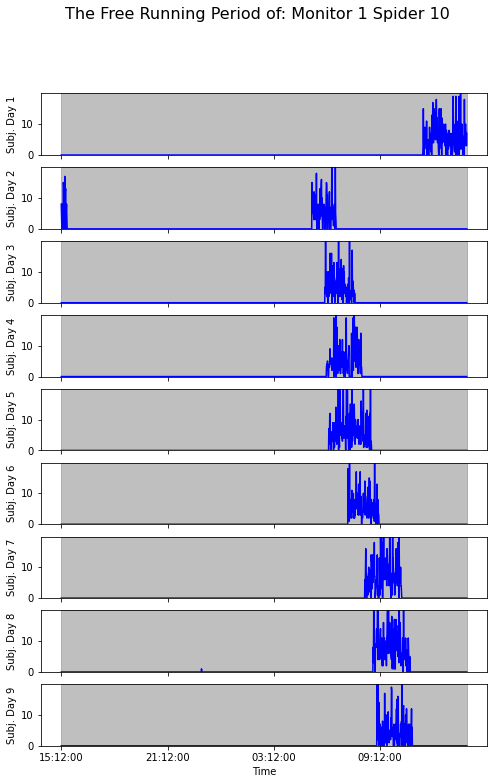

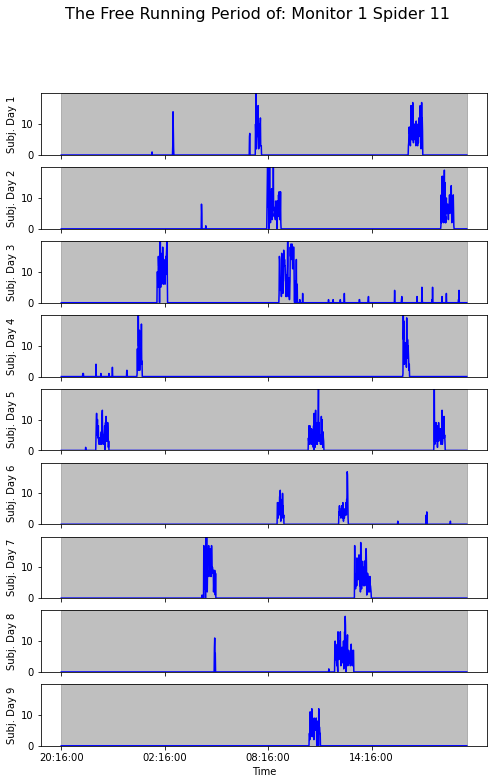

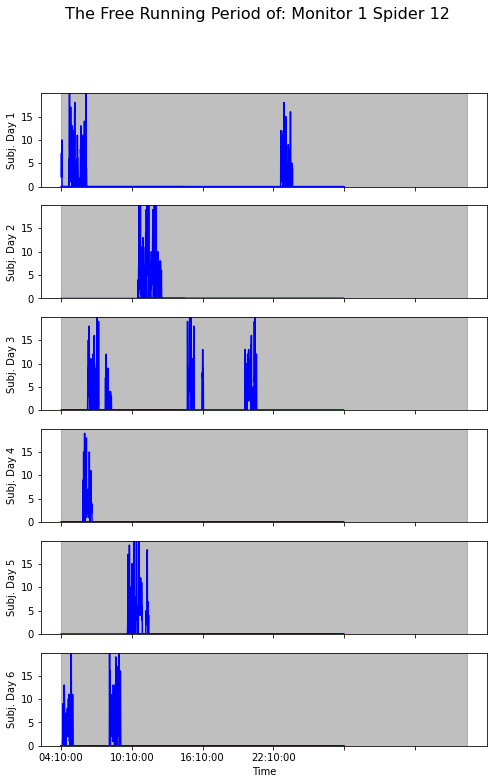

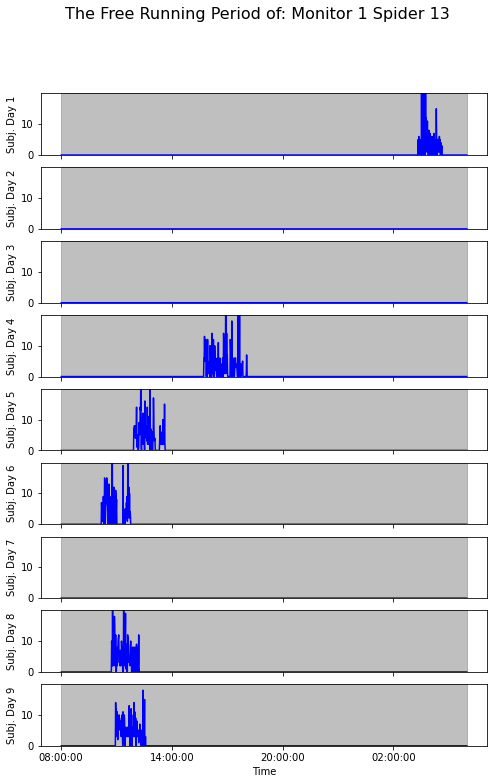

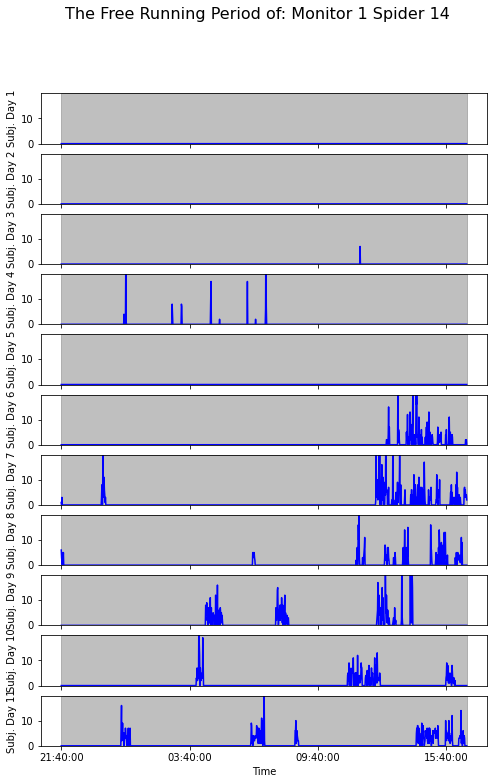

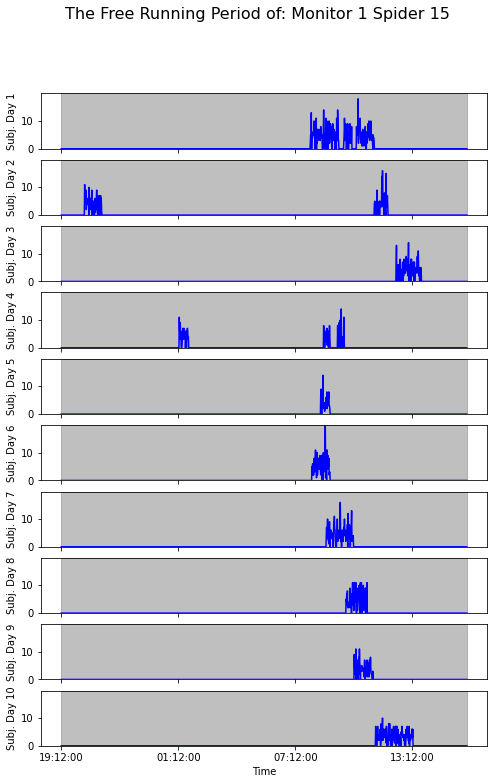

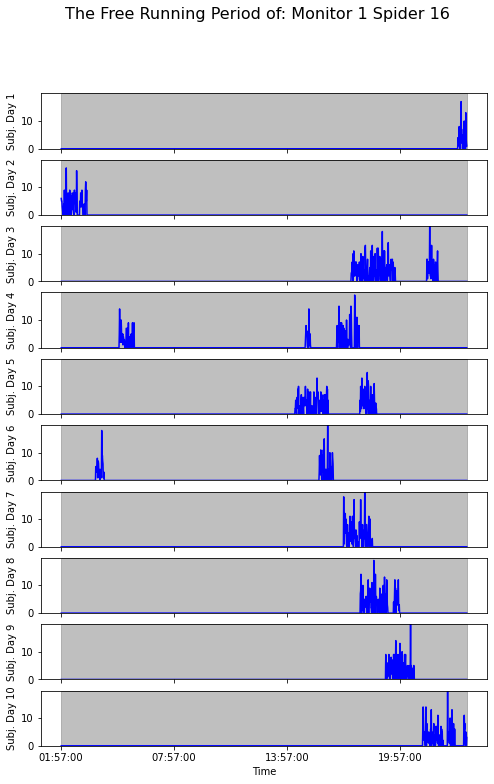

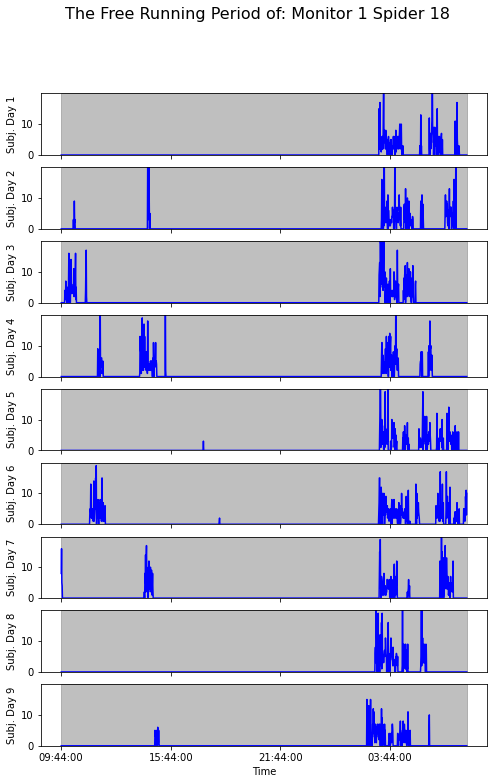

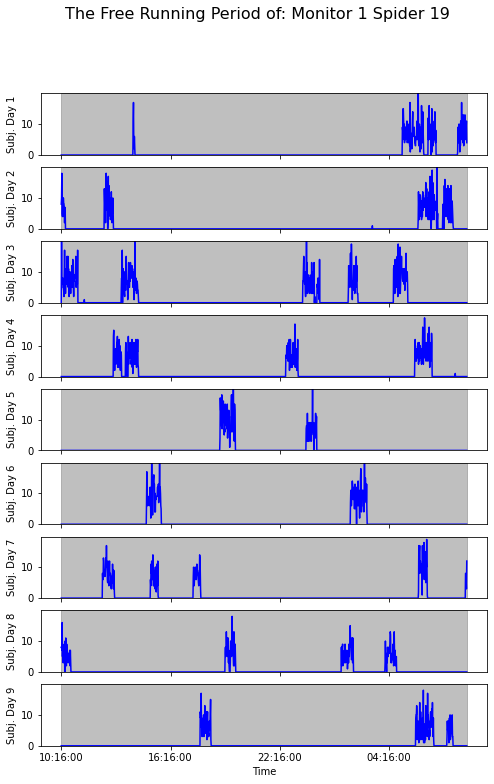

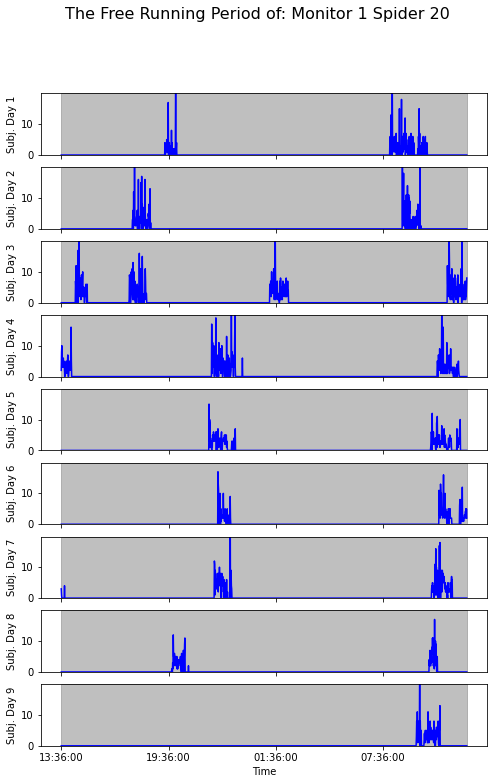

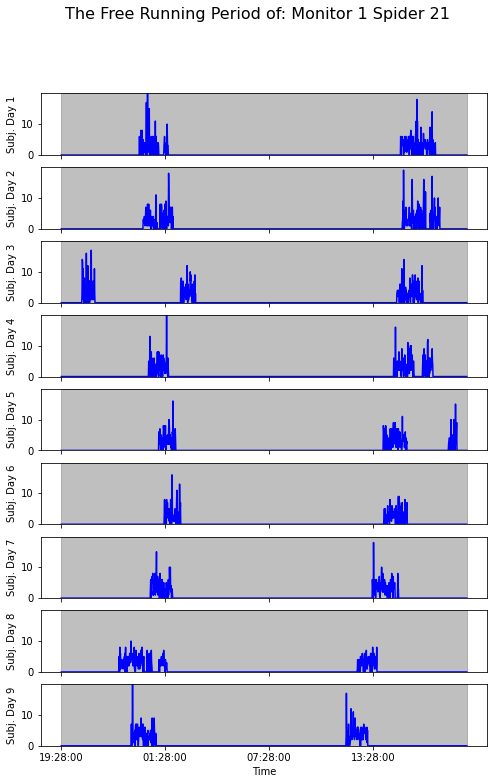

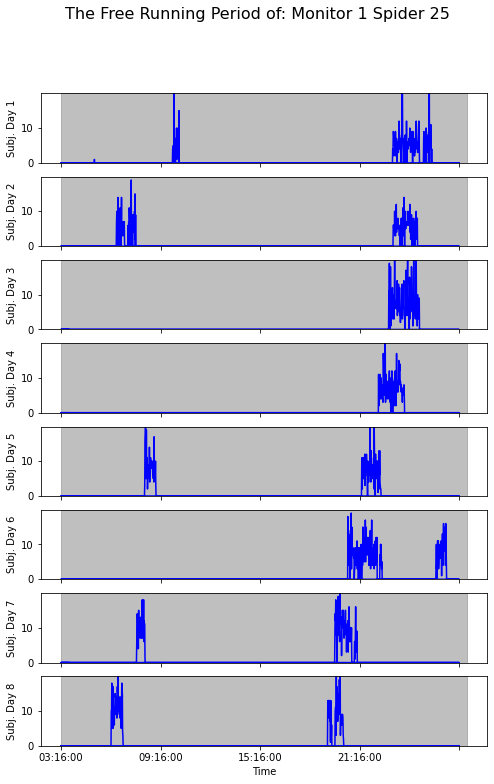

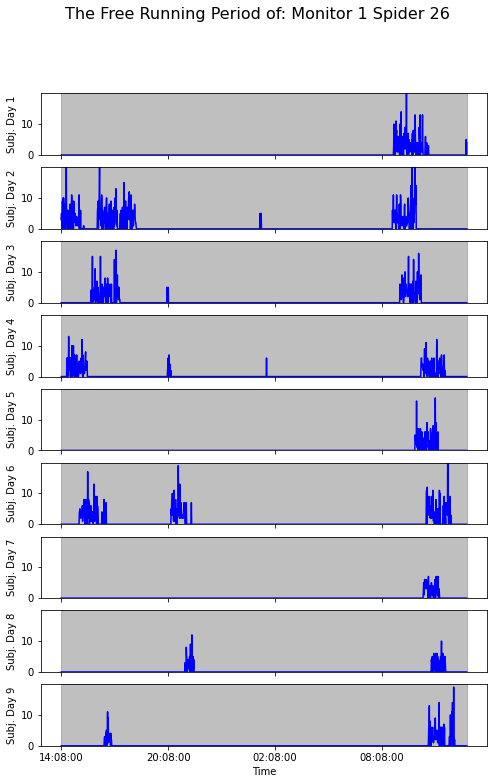

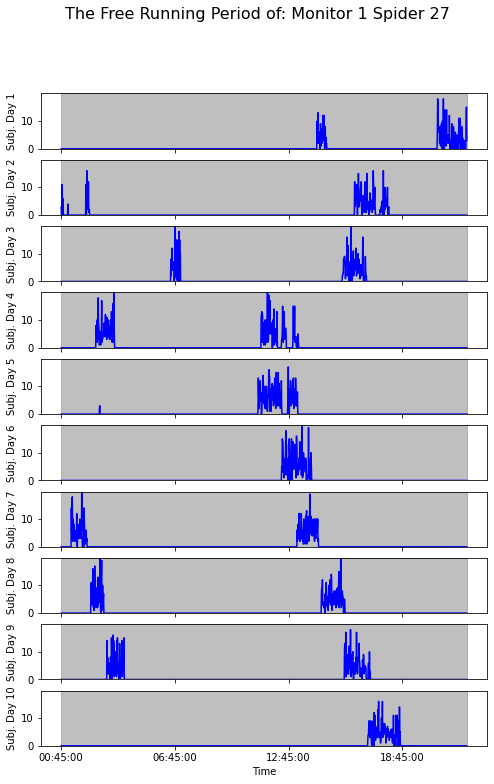

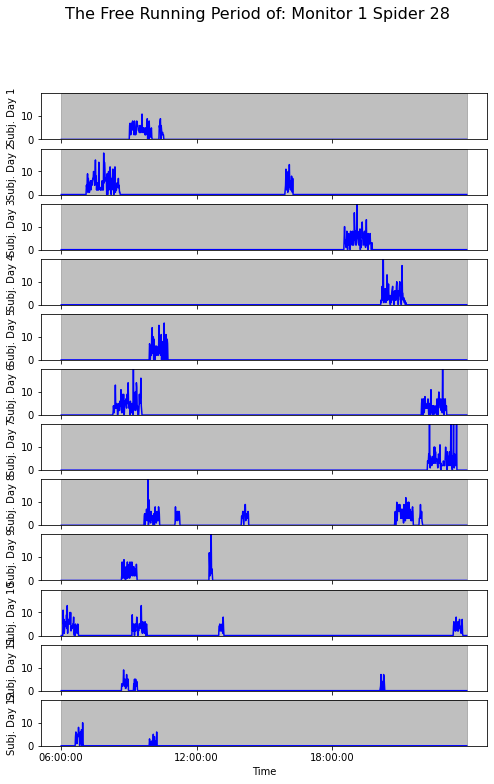

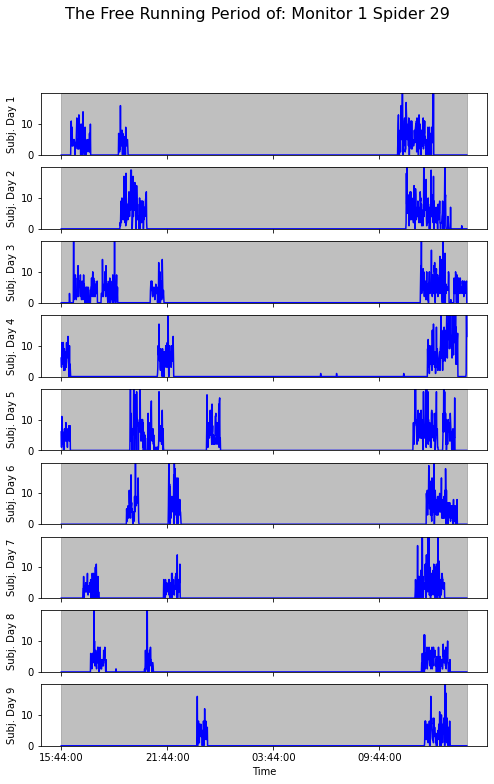

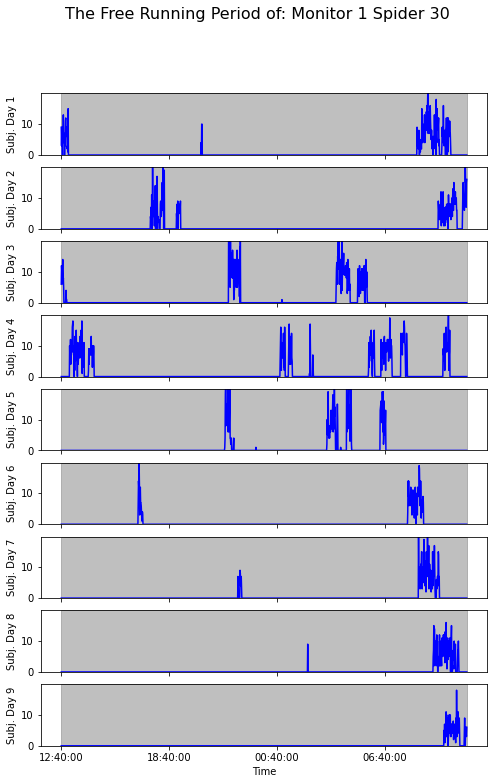

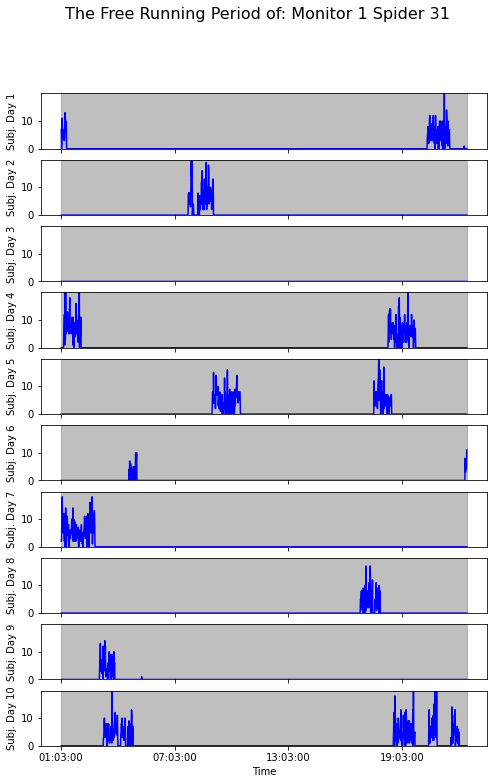

In [99]:
spider_raster(dfdark, per)

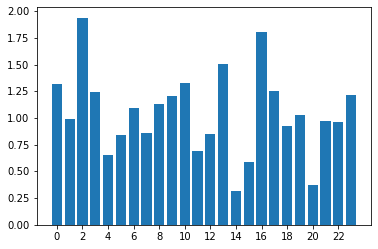

In [100]:
df_time['time'] = pd.to_datetime(df_time['time'], format = '%H:%M:%S')
df_time['hour'] = df_time['time'].dt.hour
avg_mins = df_time.groupby('hour')['Monitor 1 Spider 2'].mean()

plt.bar(avg_mins.index, avg_mins.values)
plt.xticks(range(0,24, 2))
plt.show()

In [129]:
# Convert the time column to a datetime format
df_time['time'] = pd.to_datetime(df_time['time'], format='%H:%M:%S')
# Calculate the total time duration in minutes
total_time = (df_time['time'].max() - df_time['time'].min())
# Calculate the duration of each subjective hour
subjective_day_duration = perT['Monitor 1 Spider 2'].values  # Define the subjective day duration in hours
 subjective_hour_duration = (subjective_day_duration) / 24
print(subjective_hour_duration)
# Create a new column for subjective hours
#df_time['subjective_hour'] = ((df_time['time'].dt.hour * 60 + df_time['time'].dt.minute) // subjective_hour_duration).astype(int)
# Create a new column for subjective hours
#print(subjective_hour_duration)
#print((df_time['time'].dt.hour))
df_time['subjective_hour'] = ((df_time['time'].dt.hour * 60 + df_time['time'].dt.minute) / subjective_hour_duration).astype(int)
#df_time['subjective_hour'] = (df_time['time'].dt.hour) / subjective_hour_duration
display(df_time.head(61))
# Calculate the average minutes of activity for each subjective hour
avg_minutes = df_time.groupby('subjective_hour')['Monitor 1 Spider 2'].mean()
# Plotting the bar graph
print(avg_minutes.index)
plt.bar(avg_minutes.index, avg_minutes.values)
# Customize the plot
#plt.xticks(range(0,25, 2))
plt.xlabel(range(0,25,2))
plt.xlabel('Subjective Hour of the Day')
plt.ylabel('Average Minutes of Activity')
plt.title('Average Minutes of Activity per Subjective Hour')
# Display the plot
plt.show()

[11412682188375]


ValueError: Cannot divide vectors with unequal lengths